# IMEC2001 Herramientas Computacionales 
## Semana 3: Interpolación y Curva de Bomba
### Clase 6: Interpolación

Universidad de los Andes — Agosto 28, 2023.

---

## TABLA DE CONTENIDO

### Sección 1: Interpolación [→](#section1)
- 1.1. Cargar Librerías
- 1.2. Interpolación Lineal
- 1.3. Interpolación con Splines
- 1.4. Splines 1D
- 1.5. ¿Matemáticamente?

### Sección 2: Bomba Centrífuga [→](#section2)
- 2.1. Introducción
- 2.2. Parámetros de Estudio
- 2.3. Curvas Características

### Sección 3. Puesta en Práctica [→](#section3)
- 3.1. Cargar Librerías
- 3.2. Conjunto de Datos a Interpolar
- 3.3. Interpolación Lineal
- 3.4. Interpolación con Splines
- 3.5. Actividad Clase 6: Evaluemos el Comportamiento de la Bomba Centrífuga
___

<a id="section1"></a>
# Sección 1: Interpolación

La interpolación es el ejercicio de determinar una función $ f(x) $ que pase por un conjunto de puntos.

Típicamente, en los laboratorios de los cursos de Ingeniería Mecánica, se dispone de un número de datos obtenidos por muestreo a partir de un experimento y se pretende construir una función que los ajuste para así obtener nuevos puntos y precisar/expander el análisis.

<div class="alert alert-block alert-success">
    
**Nota:** La interpolación es diferente a la *regresión* dado que la última busca determinar una función que **describa** el modelo físico particular; es decir, una tendencia.
</div>

En general, vamos a utilizar la librería `scipy` para explorar diferentes tipos de interpolación.

<div class='alert alert-block alert-info'>   
    
<i class='fa fa-info-circle' aria-hidden='true'></i>
Puede obtener más información en la documentación oficial de la librería `scipy.interpolate` dando clic [aquí](https://docs.scipy.org/doc/scipy/tutorial/interpolate.html).
</div>

## 1.1. Cargar Librerías

Primero, asegurémonos de haber instalado las librerías:

> ```python
  !pip install numpy
  !pip install scipy
  ```

In [1]:
# Datos y Gráficas
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

# OLS
import numpy as np
import scipy
import sklearn

## 1.2. Interpolación Lineal

En este escenario, tenemos un par de puntos $(x_k,\:y_k)$ y se quiere conocer el valor de $y$ para un valor cualquiera de $x$ en el intervalo $[x_0, x_1, ..., x_n]$.

El ejercicio consiste en determinar la recta que pasa por dos puntos continuos, es decir, en el intervalo $[x_k, \:x_{k+1}]$.

El modelo matemático para un par de puntos $(x_a,\:y_a)$ y $(x_b,\:y_b)$ es:

$$
y = y_a + (x - x_a) \cdot \frac{y_b - y_a}{x_b - x_a}
$$

Con la librería `scipy.interpolate` utilizamos la función `interp1d`. La sintaxis de esta función consiste en:

1. Definir el interpolador mediante `scipy.interpolate.interp1d(x, y)`.
2. Ejecutar la función determinada por el interpolador en el conjunto de puntos independiente mediante.

<div class='alert alert-block alert-info'>   
    
<i class='fa fa-info-circle' aria-hidden='true'></i>
Puede obtener más información en la documentación oficial de la librería `interp1d` dando clic [aquí](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp1d.html#scipy.interpolate.interp1d).
</div>

In [2]:
# Límite inferior y superior del intervalo
a = 0.0
b = 2 * np.pi
ndatos = 7

# Definición del intervalo
x = np.linspace(start=a, stop=b, num=ndatos)
x

array([0.        , 1.04719755, 2.0943951 , 3.14159265, 4.1887902 ,
       5.23598776, 6.28318531])

In [3]:
# Función que originalmente desconocemos
y = np.sin(x)
y

array([ 0.00000000e+00,  8.66025404e-01,  8.66025404e-01,  1.22464680e-16,
       -8.66025404e-01, -8.66025404e-01, -2.44929360e-16])

In [4]:
def formato_grafica(titulo, ejex, ejey):
    plt.rcParams['axes.axisbelow'] = True

    plt.title(titulo, fontsize=15)
    plt.ylabel(ejey, fontsize=13)
    plt.xlabel(ejex, fontsize=13)

    plt.tick_params(direction='out', length=5, width=0.75, grid_alpha=0.3)
    plt.xticks(rotation=0)
    plt.minorticks_on()
    plt.ylim(None, None)
    plt.xlim(None, None)
    plt.grid(True)
    plt.legend(loc=True)
    plt.tight_layout;

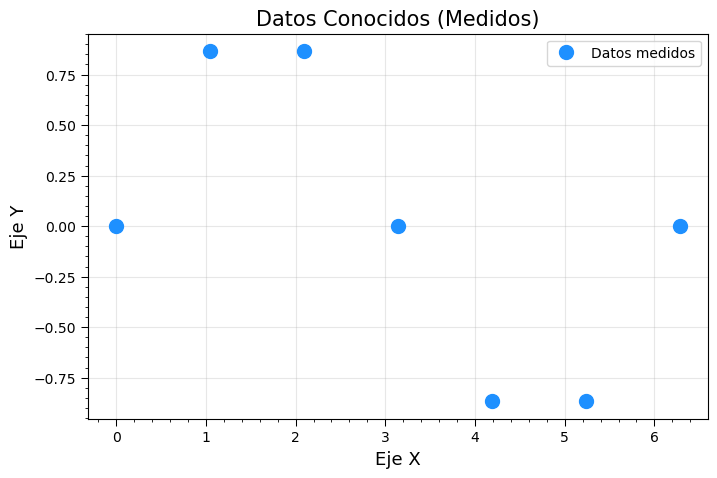

In [5]:
hor = 8
ver = 5
plt.figure(figsize=(hor, ver))

plt.plot(x, y, linestyle='', marker='o', color='dodgerblue', ms=10, label='Datos medidos')

formato_grafica(titulo='Datos Conocidos (Medidos)', 
                ejex='Eje X', 
                ejey='Eje Y')

In [6]:
# PASO 1. Creamos el interpolador lineal
itp_lineal = scipy.interpolate.interp1d(x, y)
itp_lineal

In [7]:
# PASO 2. Evaluamos el interpolador lineal
x_new = 2.5

y_new = itp_lineal(x_new)
y_new

array(0.53059285)

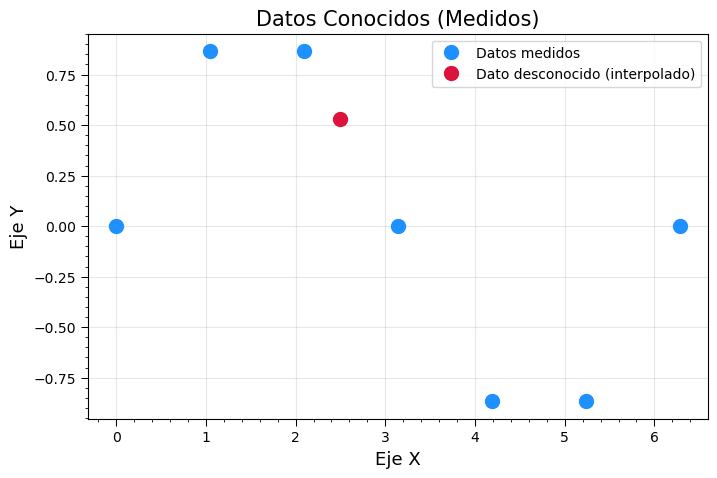

In [8]:
hor = 8
ver = 5
plt.figure(figsize=(hor, ver))

plt.plot(x, y, linestyle='', marker='o', color='dodgerblue', ms=10, label='Datos medidos')
plt.plot(x_new, y_new, linestyle='', marker='o', color='crimson', ms=10, label='Dato desconocido (interpolado)')

formato_grafica(titulo='Datos Conocidos (Medidos)', 
                ejex='Eje X', 
                ejey='Eje Y')

Si evaluamos el interpolador lineal con los datos conocidos, vemos lo siguiente:

In [9]:
y_inter = itp_lineal(x)
y_inter

array([ 0.00000000e+00,  8.66025404e-01,  8.66025404e-01,  1.22464680e-16,
       -8.66025404e-01, -8.66025404e-01, -2.44929360e-16])

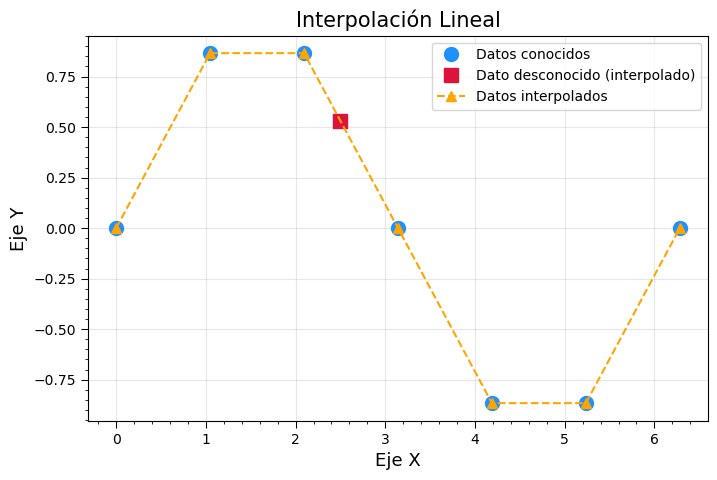

In [10]:
hor = 8
ver = 5
plt.figure(figsize=(hor, ver))

plt.plot(x, y, linestyle='', marker='o', color='dodgerblue', ms=10, label='Datos conocidos')
plt.plot(x_new, y_new, linestyle='', marker='s', color='crimson', ms=10, label='Dato desconocido (interpolado)')
plt.plot(x, y_inter, linestyle='--', marker='^', color='orange', ms=7, label='Datos interpolados')

formato_grafica(titulo='Interpolación Lineal', 
                ejex='Eje X', 
                ejey='Eje Y')

Note lo que sucede si se aumenta el número de puntos del conjunto de datos conocidos.

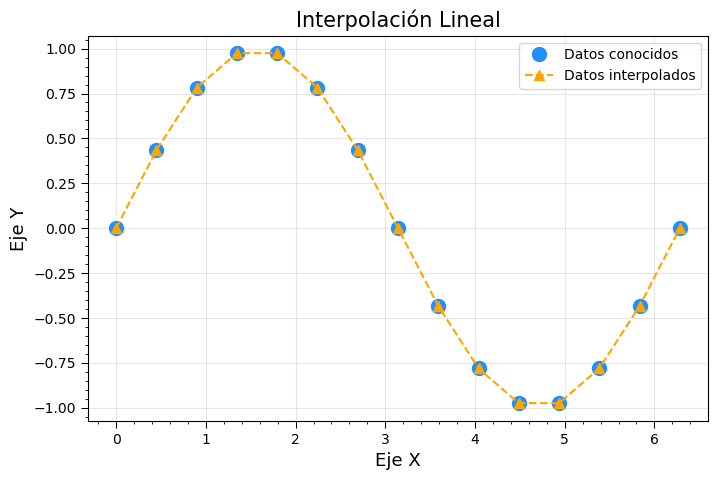

In [11]:
ndatos = 15
x = np.linspace(start=a, stop=b, num=ndatos)
y = np.sin(x)

# PASO 1. Creamos el interpolador lineal
itp_lineal = scipy.interpolate.interp1d(x, y)

# PASO 2. Evaluamos el interpolador lineal
y_inter = itp_lineal(x)

# Gráfica
hor = 8
ver = 5
plt.figure(figsize=(hor, ver))

plt.plot(x, y, linestyle='', marker='o', color='dodgerblue', ms=10, label='Datos conocidos')
plt.plot(x, y_inter, linestyle='--', marker='^', color='orange', ms=7, label='Datos interpolados')

formato_grafica(titulo='Interpolación Lineal', 
                ejex='Eje X', 
                ejey='Eje Y')

Ahora, si en lugar de partir de una función utilizamos una nube de puntos (como típicamente es en un laboratorio), ¿cómo lo haríamos y qué obtendríamos?

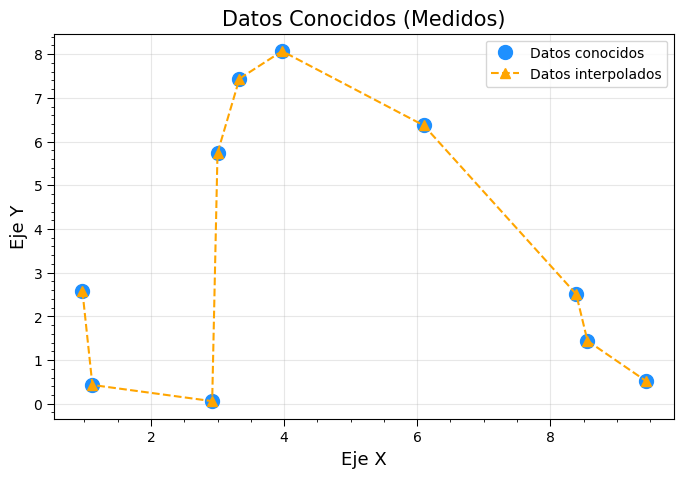

In [12]:
xx = [0.97, 1.12, 2.92, 3.00, 3.33, 3.97, 6.10, 8.39, 8.56, 9.44]
yy = [2.58, 0.43, 0.06, 5.74, 7.44, 8.07, 6.37, 2.51, 1.44, 0.52]

# PASO 1. Creamos el interpolador lineal
itp_lineal = scipy.interpolate.interp1d(xx, yy)

# PASO 2. Evaluamos el interpolador lineal
y_inter = itp_lineal(xx)

# Gráfica
hor = 8
ver = 5
plt.figure(figsize=(hor, ver))

plt.plot(xx, yy, linestyle='', marker='o', color='dodgerblue', ms=10, label='Datos conocidos')
plt.plot(xx, y_inter, linestyle='--', marker='^', color='orange', ms=7, label='Datos interpolados')

formato_grafica(titulo='Datos Conocidos (Medidos)', 
                ejex='Eje X', 
                ejey='Eje Y')

In [13]:
x_new = 5.3
y_new = itp_lineal(x_new)

print(f'Para xx = {x_new}, el valor de yy es {np.round(y_new, 2)}.')

Para xx = 5.3, el valor de yy es 7.01.


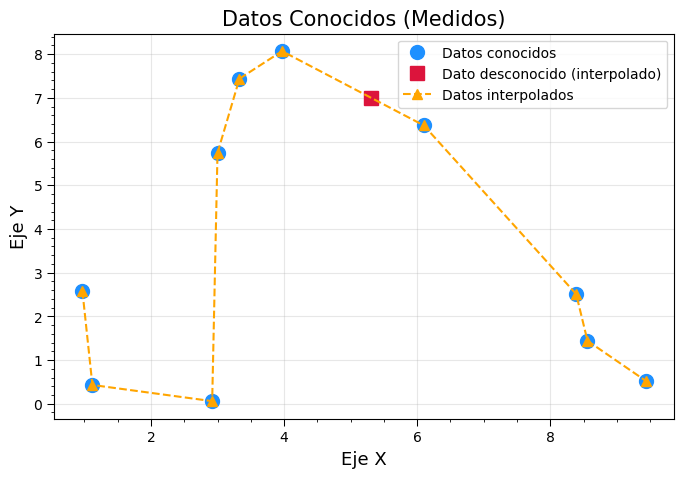

In [14]:
hor = 8
ver = 5
plt.figure(figsize=(hor, ver))

plt.plot(xx, yy, linestyle='', marker='o', color='dodgerblue', ms=10, label='Datos conocidos')
plt.plot(x_new, y_new, linestyle='', marker='s', color='crimson', ms=10, label='Dato desconocido (interpolado)')
plt.plot(xx, y_inter, linestyle='--', marker='^', color='orange', ms=7, label='Datos interpolados')

formato_grafica(titulo='Datos Conocidos (Medidos)', 
                ejex='Eje X', 
                ejey='Eje Y')

## 1.3. Interpolación con Splines

Un *spline* es una curva suave definida en partes mediante diferentes polinomios.

En interpolación, los *splines* dan lugar a buenos resultados para formas complicadas requiriendo solamente el uso de polinomios de bajo grado, evitando así las oscilaciones indeseables que se dan al interpolar mediante polinomios de grado elevado.

Con la librería `scipy.interpolate` utilizamos la función `splrep` para crear el interpolador con *spline* cúbico, y luego la función `splev` para evaluar el interpolador con datos desconocidos.

Si se tienen solo dos puntos, el polinomio que pasa por estos es de grado uno, es decir, una recta. Si se tienen tres puntos, el polinomio es de segundo grado, es decir, unaparábola. Por tanto, en el caso general de tener $n$ puntos, el polinomio sería de grado $n-1$, es decir:

$$
y = a_0 x^{n-1} + a_1 x^{n-2} + ... + a_{n-2} x + a_{n-1}
$$

<div class='alert alert-block alert-info'>   
    
<i class='fa fa-info-circle' aria-hidden='true'></i>
Puede obtener más información en la documentación oficial de la librería `splprep` dando clic [aquí](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.splprep.html#scipy.interpolate.splprep) y `splev` dando clic [aquí](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.splev.html#scipy.interpolate.splev).
</div>

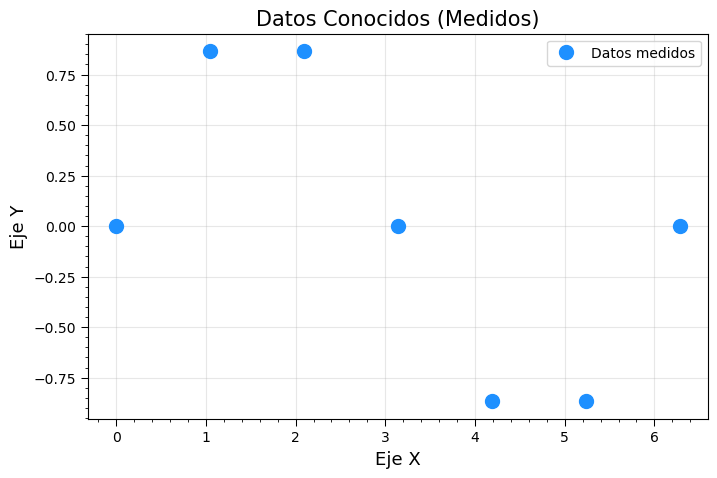

In [15]:
# Límite inferior y superior del intervalo
a = 0.0
b = 2 * np.pi
ndatos = 7

# Definición del intervalo
x = np.linspace(start=a, stop=b, num=ndatos)

# Función que originalmente desconocemos
y = np.sin(x)

# Gráfica
hor = 8
ver = 5
plt.figure(figsize=(hor, ver))

plt.plot(x, y, linestyle='', marker='o', color='dodgerblue', ms=10, label='Datos medidos')

formato_grafica(titulo='Datos Conocidos (Medidos)', 
                ejex='Eje X', 
                ejey='Eje Y')

In [16]:
# PASO 1. Creamos el interpolador spline cúbico
itp_spline = scipy.interpolate.splrep(x, y, k=3) # k es el grado del spline (para cúbico, k=3)

# PASO 2. Evaluamos el interpolador spline cúbico
x_new = np.linspace(start=a, stop=b, num=15)
y_new = scipy.interpolate.splev(x_new, tck=itp_spline)
y_new

array([-1.08918381e-18,  4.63310967e-01,  7.90279742e-01,  9.63863551e-01,
        9.67019620e-01,  7.83336389e-01,  4.34275130e-01,  8.32667268e-17,
       -4.34275130e-01, -7.83336389e-01, -9.67019620e-01, -9.63863551e-01,
       -7.90279742e-01, -4.63310967e-01, -2.44929360e-16])

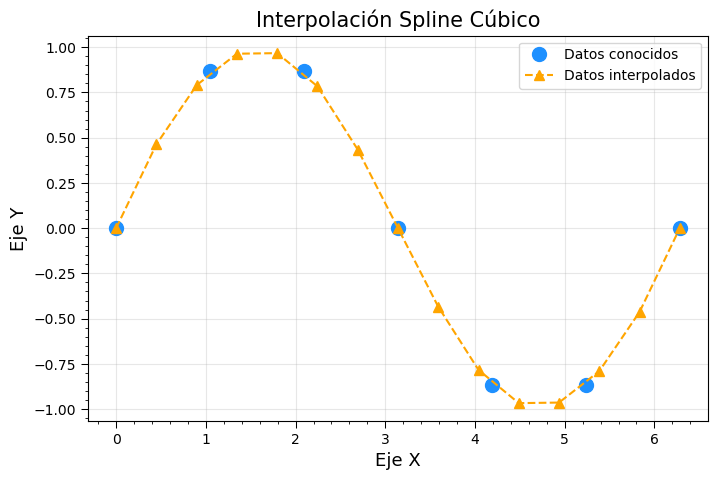

In [17]:
hor = 8
ver = 5
plt.figure(figsize=(hor, ver))

plt.plot(x, y, linestyle='', marker='o', color='dodgerblue', ms=10, label='Datos conocidos')
plt.plot(x_new, y_new, linestyle='--', marker='^', color='orange', ms=7, label='Datos interpolados')

formato_grafica(titulo='Interpolación Spline Cúbico', 
                ejex='Eje X', 
                ejey='Eje Y')

<a id="section2"></a>
# Sección 2: Bomba Centrífuga

## 2.1. Introducción

Una bomba es un dispositivo que **añade energía a un fluido**. Hablando específicamente de la bombas centrífugas, estas añaden una cantidad de movimiento al fluido por medio de paletas, también llamados álabes. 

<img src='./img/centrifugal_pump.gif' width='250' height='250' />

Las bombas centrífugas proporcionan grandes caudales (hasta 300.000 gal/min) con bajos incrementos de presión (pocas atmósferas).<br><br>


De manera general, el flujo de la operación es:
> - **Paso 1.** El fluido entra axialmente a través del ojo, en el eje de la carcasa.
> - **Paso 2.** Los álabes del rotor fuerzan el fluido a tomar un movimiento tangencial y radial hacia el exterior del rotor, donde es recogido por una carcasa que hace de difusor.
> - **Paso 3.** El fluido aumenta su velocidad y presión cuando pasa a través del rotor.
> - **Paso 4.** La parte de la carcasa, con forma de voluta, desacelera el flujo y aumenta más la presión.

<img src='./img/esquematico.png' width='500' height='500' />

## 2.2. Parámetros de Estudio

La potencia que la bomba centrífuga le añade al fluido (conocida como **potencia hidráulica** $P_w$), es:

$$
P_w = \rho g Q H
$$

Donde $\rho$ es la densidad del fluido, $g$ la gravedad, $Q$ el caudal y $H$ la altura manométrica, definida como:

$$
H = \frac{\Delta p}{\rho g}
$$

Siendo $\Delta p$ el cambio de presión entre la entrada y salida de la bomba centrífuga.

También, recordemos que el caudal es:

$$
Q = V \cdot A
$$

Siendo $V$ la velocidad media del fluido y $A$ el área transversal de la tubería. Las unidades del caudal son de volumen sobre tiempo.

Ahora bien, para que la bomba centrífuga le añada energía al fluido, debe haber un recurso que, asimismo, le suministre energía al dispositivo. Esto último es conocido como **potencia mecánica** $P_f$ y es el producto entre la velocidad de rotación del eje de la bomba $w$ y el torque en el mismo $T$.

$$
P_f = w T
$$

Luego, si el insumo es $P_f$ y la salida es $P_w$, la eficiencia de la bomba es la relación entre estos parámetros, es decir:

$$
\eta = \frac{P_w}{P_f} = \frac{\rho g Q H}{w T}
$$

Entonces, el rendimiento de la bomba centrífuga depende de tres factores: volumétrico, hidráulico y mecánico. 

## 2.3. Curvas Características

Las curvas características de las bombas centrífugas se trazan para velocidad de giro $n$ constante del eje (en RPM). El caudal $Q$ (en gal/min o gpm) se toma como variable independiente, es decir, se ubica en el eje horizontal. 

Las variables dependientes (se ubican en el eje vertical) son:
- Altura manométrica $H$.
- Potencia mecánica $P_f$.
- Eficiencia $\eta$.

<img src='./img/curvas_teoricas.png' width='400' height='400' />

En la práctica, aunque las curvas de la altura manométrica $H$ aparecen explícitamente, las de potencia $P_f$ y rendimiento $\eta$ deben deducirse a partir de los datos medidos. Fíjense, **es como los laboratorios que hacemos en los cursos de ingeniería mecánica**.

<img src='./img/curvas_reales.png' width='900' height='900' />

La variable $NPSH$ (*Net-Positive Suction Head*) es la **altura neta de succión**, también llamada **cabeza** neta de succión, y establece el valor de presión disponible a la entrada de la bomba para evitar la cavitación o evaporación del líquido.

$$
NPSH = \frac{p_{in}}{\rho g} + \frac{V_{in}^2}{2g} - \frac{p_{vapor}}{\rho g}
$$

<img src='./img/npsh.png' width='400' height='400' />

<a id="section3"></a>
# Sección 3. Puesta en Práctica

## 3.1. Cargar Librerías

In [18]:
# Datos y Gráficas
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

# OLS
import numpy as np
import scipy
import sklearn

## 3.2. Conjunto de Datos a Interpolar

Conformemos entonces la nube de puntos para un diámetro de rotor de 36 3/4 in. Empecemos con tres datos (a ver qué tal) y luego aumentamos dos puntos más.

<img src='./img/curva_practica.png' width='500' height='500' />

In [19]:
# PASO 1. Toma de datos
Q = [0.0, 6.0, 12.0, 20.0, 26.0] # gal/min
H = [655.0, 645.0, 620.0, 560.0, 460.] # ft

In [20]:
# PASO 2. Los guardamos en un pandas.DataFrame
df = pd.DataFrame({'Caudal': Q,
                   'Altura': H})

df

,Caudal,Altura
0,0.0,655.0
1,6.0,645.0
2,12.0,620.0
3,20.0,560.0
4,26.0,460.0


## 3.3. Interpolación Lineal

Como vimos en la Sección 1 ([→](#section1)), con la librería `scipy.interpolate` utilizamos la función `interp1d`. La sintaxis de esta función consiste en:

1. Definir el interpolador mediante `scipy.interpolate.interp1d(x, y)`.
2. Ejecutar la función determinada por el interpolador en el conjunto de puntos independiente mediante.

<div class='alert alert-block alert-info'>   
    
<i class='fa fa-info-circle' aria-hidden='true'></i>
Puede obtener más información en la documentación oficial de la librería `interp1d` dando clic [aquí](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp1d.html#scipy.interpolate.interp1d).
</div>

In [21]:
# PASO 1. Creamos el interpolador lineal
itp_lineal = scipy.interpolate.interp1d(df['Caudal'], df['Altura'])
itp_lineal

In [22]:
# PASO 2. Evaluamos el interpolador lineal
H_inter = itp_lineal(df['Caudal'])
H_inter

array([655., 645., 620., 560., 460.])

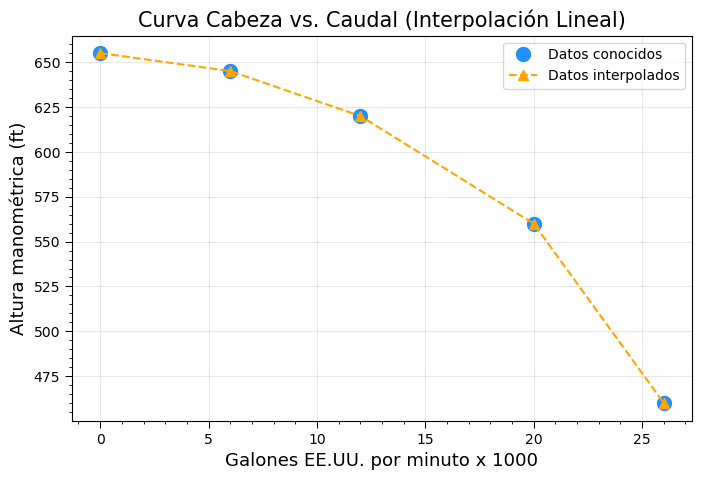

In [23]:
# Gráfica
hor = 8
ver = 5
plt.figure(figsize=(hor, ver))

plt.plot(df['Caudal'], df['Altura'], linestyle='', marker='o', color='dodgerblue', ms=10, label='Datos conocidos')
plt.plot(df['Caudal'], H_inter, linestyle='--', marker='^', color='orange', ms=7, label='Datos interpolados')

formato_grafica(titulo='Curva Cabeza vs. Caudal (Interpolación Lineal)', 
                ejex='Galones EE.UU. por minuto x 1000', 
                ejey='Altura manométrica (ft)')

En este caso, si quisiera conocer el valor en un punto dado, debo utilizar la misma función, indicando el valor de interés, es decir: `itp_lineal(x_new)`.

Por ejemplo, estimemos el valor de la cabeza $H$ cuando el caudal toma un valor de 16 (la interpolación debe ser para valores dentro del rango de las mediciones, es decir $Q \in {[0, 26]}$).

In [24]:
# PASO 1. Indicamos el valor de interés
x_new = 16

# PASO 2. Evaluamos el interpolador lineal
y_new = itp_lineal(x_new)
y_new

array(590.)

Ahora, si deseamos estudiar la relación entre el caudal $Q$ y la altura manométrica $H$ a partir de nuevos datos, deberíamos tener un comportamiento similar al siguiente:

<img src='./img/curvas_teoricas.png' width='400' height='400' />

In [25]:
# PASO 1. Definimos los datos de estudio
Q_estudio = np.linspace(start=0, stop=26, num=50)
Q_estudio

array([ 0.        ,  0.53061224,  1.06122449,  1.59183673,  2.12244898,
        2.65306122,  3.18367347,  3.71428571,  4.24489796,  4.7755102 ,
        5.30612245,  5.83673469,  6.36734694,  6.89795918,  7.42857143,
        7.95918367,  8.48979592,  9.02040816,  9.55102041, 10.08163265,
       10.6122449 , 11.14285714, 11.67346939, 12.20408163, 12.73469388,
       13.26530612, 13.79591837, 14.32653061, 14.85714286, 15.3877551 ,
       15.91836735, 16.44897959, 16.97959184, 17.51020408, 18.04081633,
       18.57142857, 19.10204082, 19.63265306, 20.16326531, 20.69387755,
       21.2244898 , 21.75510204, 22.28571429, 22.81632653, 23.34693878,
       23.87755102, 24.40816327, 24.93877551, 25.46938776, 26.        ])

In [26]:
# PASO 2. Evaluamos el interpolador lineal para los datos de estudio

## 2.1. Creamos una lista vacía donde guardar los datos nuevos
H_itp = []

## 2.2. Interpolamos los datos de estudio
for i in Q_estudio:
    H_itp.append( itp_lineal(i) )

H_itp

[array(655.),
 array(654.11564626),
 array(653.23129252),
 array(652.34693878),
 array(651.46258503),
 array(650.57823129),
 array(649.69387755),
 array(648.80952381),
 array(647.92517007),
 array(647.04081633),
 array(646.15646259),
 array(645.27210884),
 array(643.46938776),
 array(641.2585034),
 array(639.04761905),
 array(636.83673469),
 array(634.62585034),
 array(632.41496599),
 array(630.20408163),
 array(627.99319728),
 array(625.78231293),
 array(623.57142857),
 array(621.36054422),
 array(618.46938776),
 array(614.48979592),
 array(610.51020408),
 array(606.53061224),
 array(602.55102041),
 array(598.57142857),
 array(594.59183673),
 array(590.6122449),
 array(586.63265306),
 array(582.65306122),
 array(578.67346939),
 array(574.69387755),
 array(570.71428571),
 array(566.73469388),
 array(562.75510204),
 array(557.27891156),
 array(548.43537415),
 array(539.59183673),
 array(530.74829932),
 array(521.9047619),
 array(513.06122449),
 array(504.21768707),
 array(495.37414966),

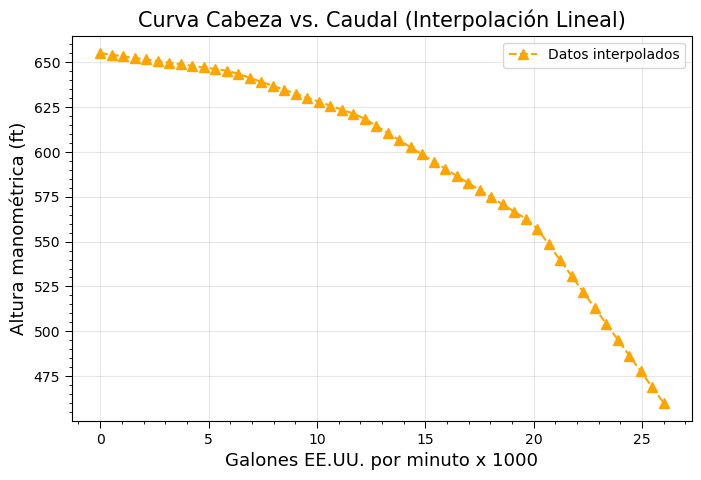

In [27]:
# Gráfica
hor = 8
ver = 5
plt.figure(figsize=(hor, ver))

plt.plot(Q_estudio, H_itp, linestyle='--', marker='^', color='orange', ms=7, label='Datos interpolados')

formato_grafica(titulo='Curva Cabeza vs. Caudal (Interpolación Lineal)', 
                ejex='Galones EE.UU. por minuto x 1000', 
                ejey='Altura manométrica (ft)')

## 3.4. Interpolación con Splines

En ingeniería, y en específico en los cursos de ingeniería mecánica, de los datos obtenidos de un experimento se crea una tabla de valores, a partir de la cual muchas veces se necesita conocer a qué función matemática pertenece.

Recordemos que por interpolación se entiende **estimar el valor desconocido de una función también desconocida en un punto**, es decir, ¿cuánto "*vale*" el valor aproximado de "*y*", a partir de “*x*”, o viceversa, si se desconoce la función?

Como hemos visto, la interpolación, como método numérico, genera una medida ponderada de sus valores conocidos en puntos cercanos al punto dado. También, la interpolación resuelve el problema referido a encontrar un polinomio que
pase por puntos dados $(x_i,\:y_i)$.

Esto es, permite a partir de los puntos dados, encontrar una función aproximada (un polinomio) que define el fenómeno, y que pasa exactamente por esos puntos. Así, se puede conocer parte del comportamiento de la función desconocida $f(x)$.

Por último, recordemos también que un *spline* es una curva suave definida en partes mediante diferentes polinomios.

In [28]:
df

,Caudal,Altura
0,0.0,655.0
1,6.0,645.0
2,12.0,620.0
3,20.0,560.0
4,26.0,460.0


In [29]:
x = df['Caudal']
y = df['Altura']

In [30]:
# PASO 1. Creamos el interpolador spline
spline1d = scipy.interpolate.splrep(x, y, k=1)
spline2d = scipy.interpolate.splrep(x, y, k=2)
spline3d = scipy.interpolate.splrep(x, y, k=3)
spline4d = scipy.interpolate.splrep(x, y, k=4)

In [31]:
# PASO 2. Evaluamos el interpolador spline
x_new = np.linspace(start=0, stop=26, num=50)

y_new_1d = scipy.interpolate.splev(x_new, tck=spline1d)
y_new_2d = scipy.interpolate.splev(x_new, tck=spline2d)
y_new_3d = scipy.interpolate.splev(x_new, tck=spline3d)
y_new_4d = scipy.interpolate.splev(x_new, tck=spline4d)

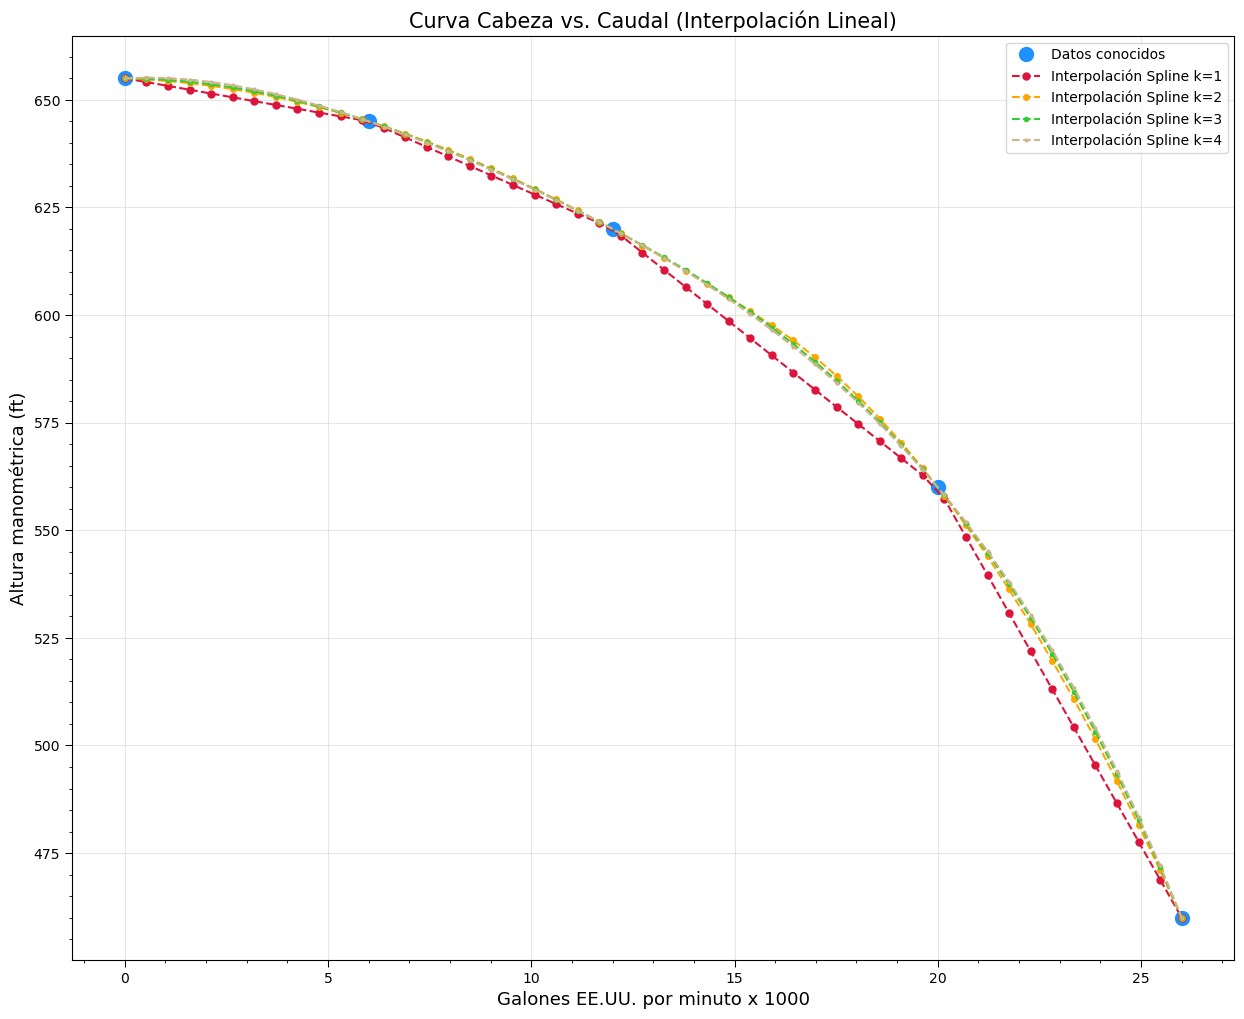

In [32]:
# Gráfica
hor = 15
ver = 12
plt.figure(figsize=(hor, ver))

plt.plot(x, y, linestyle='', marker='o', color='dodgerblue', ms=10, label='Datos conocidos')
plt.plot(x_new, y_new_1d, linestyle='--', marker='.', color='crimson', ms=10, label='Interpolación Spline k=1')
plt.plot(x_new, y_new_2d, linestyle='--', marker='.', color='orange', ms=8, label='Interpolación Spline k=2')
plt.plot(x_new, y_new_3d, linestyle='--', marker='.', color='limegreen', ms=6, label='Interpolación Spline k=3')
plt.plot(x_new, y_new_4d, linestyle='--', marker='.', color='tan', ms=4, label='Interpolación Spline k=4')

formato_grafica(titulo='Curva Cabeza vs. Caudal (Interpolación Lineal)', 
                ejex='Galones EE.UU. por minuto x 1000', 
                ejey='Altura manométrica (ft)')

## 3.5. Actividad Clase 6: Evaluemos el Comportamiento de la Bomba Centrífuga

<div class="alert alert-block alert-warning">

Para las mediciones de los datos de caudal $Q$ y, sabiendo que la velocidad de rotación del eje de la bomba $w$ es 1170 rpm y la eficiencia $\eta$ es 82$\%$, verifiquemos la relación entre caudal $Q$ y torque $T$. Asumimos $\rho g = 1$. Para esto:

$$
\eta = \frac{P_w}{P_f} = \frac{\rho g Q H}{w T}
$$

Luego:

$$
T = \frac{\rho g Q H}{w \eta} = \frac{Q H}{1170 \cdot 0.82}
$$

Comparemos los resultados si utilizamos una **interpolación lineal** y ***spline* cúbica**.
    
</div>

In [33]:
df

,Caudal,Altura
0,0.0,655.0
1,6.0,645.0
2,12.0,620.0
3,20.0,560.0
4,26.0,460.0


In [34]:
x = df['Caudal'].values
y = df['Altura'].values

In [35]:
#  PASO 1. Creamos el interpolador lineal
itp_lineal = scipy.interpolate.interp1d(x, y)

In [36]:
# PASO 2. Creamos el interpolador spline cúbico
spline3d = scipy.interpolate.splrep(x, y, k=3)

In [37]:
#  PASO 3. Creamos los datos de estudio
Q_estudio = np.linspace(start=x[0], stop=x[-1], num=50)
Q_estudio

array([ 0.        ,  0.53061224,  1.06122449,  1.59183673,  2.12244898,
        2.65306122,  3.18367347,  3.71428571,  4.24489796,  4.7755102 ,
        5.30612245,  5.83673469,  6.36734694,  6.89795918,  7.42857143,
        7.95918367,  8.48979592,  9.02040816,  9.55102041, 10.08163265,
       10.6122449 , 11.14285714, 11.67346939, 12.20408163, 12.73469388,
       13.26530612, 13.79591837, 14.32653061, 14.85714286, 15.3877551 ,
       15.91836735, 16.44897959, 16.97959184, 17.51020408, 18.04081633,
       18.57142857, 19.10204082, 19.63265306, 20.16326531, 20.69387755,
       21.2244898 , 21.75510204, 22.28571429, 22.81632653, 23.34693878,
       23.87755102, 24.40816327, 24.93877551, 25.46938776, 26.        ])

In [38]:
# PASO 4. Evaluamos el interpolador lineal con los datos de estudio
H_lineal = []

for i in Q_estudio:
    H_lineal.append( itp_lineal(i) )

H_lineal

[array(655.),
 array(654.11564626),
 array(653.23129252),
 array(652.34693878),
 array(651.46258503),
 array(650.57823129),
 array(649.69387755),
 array(648.80952381),
 array(647.92517007),
 array(647.04081633),
 array(646.15646259),
 array(645.27210884),
 array(643.46938776),
 array(641.2585034),
 array(639.04761905),
 array(636.83673469),
 array(634.62585034),
 array(632.41496599),
 array(630.20408163),
 array(627.99319728),
 array(625.78231293),
 array(623.57142857),
 array(621.36054422),
 array(618.46938776),
 array(614.48979592),
 array(610.51020408),
 array(606.53061224),
 array(602.55102041),
 array(598.57142857),
 array(594.59183673),
 array(590.6122449),
 array(586.63265306),
 array(582.65306122),
 array(578.67346939),
 array(574.69387755),
 array(570.71428571),
 array(566.73469388),
 array(562.75510204),
 array(557.27891156),
 array(548.43537415),
 array(539.59183673),
 array(530.74829932),
 array(521.9047619),
 array(513.06122449),
 array(504.21768707),
 array(495.37414966),

In [39]:
# PASO 5. Evaluamos el interpolador spline cúbico
H_spline3d = []

for i in Q_estudio:
    H_spline3d.append( scipy.interpolate.splev(i, tck=spline3d) )

H_spline3d

[array(655.),
 array(654.89967181),
 array(654.63222898),
 array(654.20250309),
 array(653.61532571),
 array(652.87552844),
 array(651.98794283),
 array(650.95740047),
 array(649.78873293),
 array(648.48677179),
 array(647.05634863),
 array(645.50229502),
 array(643.82944254),
 array(642.04262277),
 array(640.14666728),
 array(638.14640766),
 array(636.04667546),
 array(633.85230229),
 array(631.5681197),
 array(629.19895928),
 array(626.7496526),
 array(624.22503124),
 array(621.62992677),
 array(618.968915),
 array(616.23566104),
 array(613.40907032),
 array(610.46700059),
 array(607.38730959),
 array(604.14785506),
 array(600.72649475),
 array(597.1010864),
 array(593.24948776),
 array(589.14955657),
 array(584.77915057),
 array(580.11612751),
 array(575.13834513),
 array(569.82366118),
 array(564.1499334),
 array(558.09501953),
 array(551.63677731),
 array(544.7530645),
 array(537.42173884),
 array(529.62065806),
 array(521.32767991),
 array(512.52066215),
 array(503.1774625),
 arr

In [40]:
# PASO 6. Calculamos el torque
T_lineal = (Q_estudio * H_lineal) / (1170 * 0.82)
T_spline3d = (Q_estudio * H_spline3d) / (1170 * 0.82)

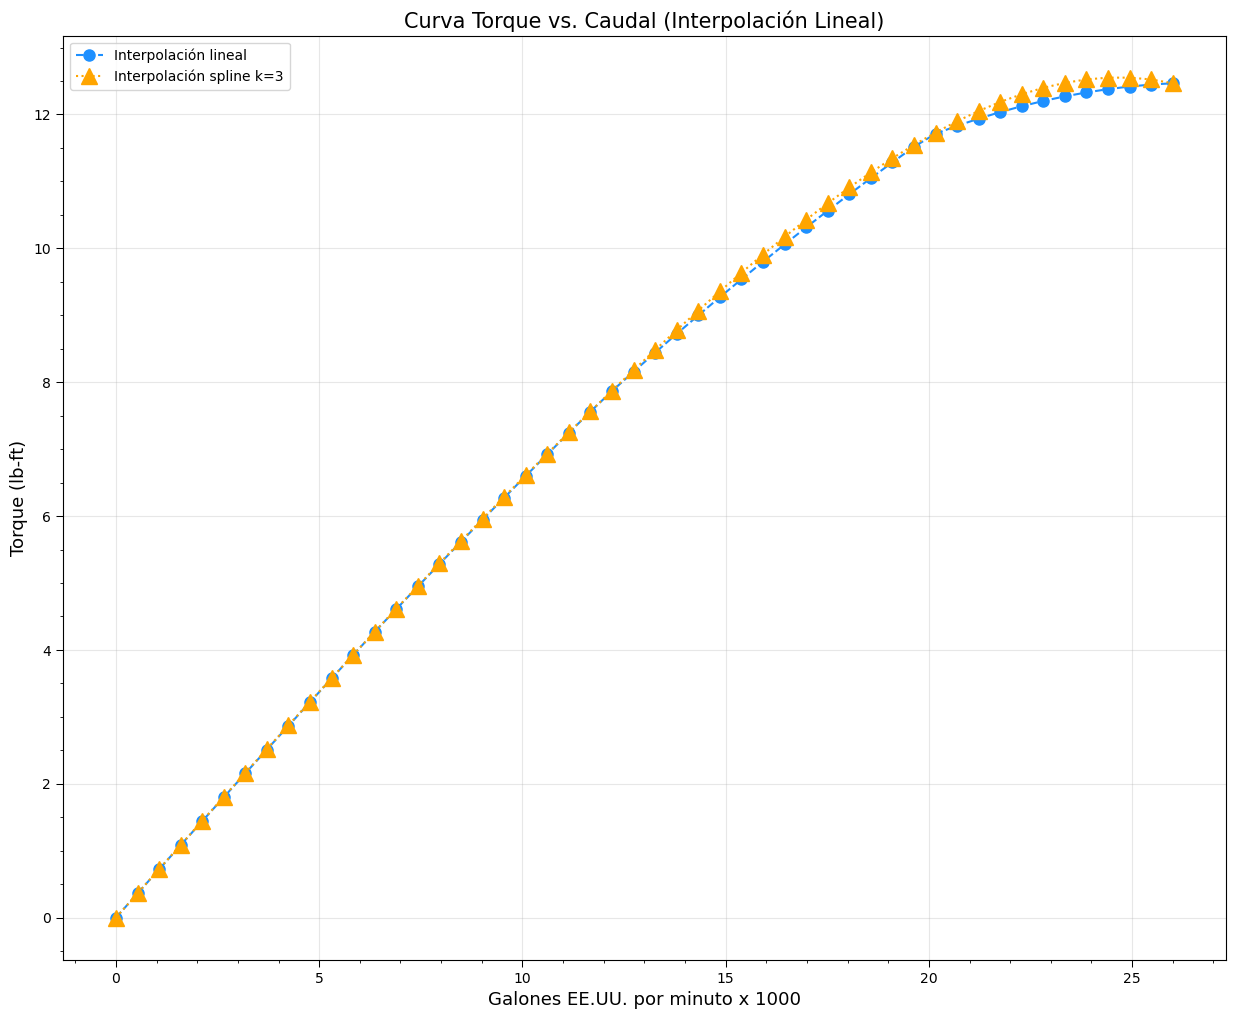

In [41]:
# Gráfica
hor = 15
ver = 12

plt.figure(figsize=(hor, ver))

plt.plot(Q_estudio, T_lineal, linestyle='--', marker='o', color='dodgerblue', ms=8, label='Interpolación lineal')
plt.plot(Q_estudio, T_spline3d, linestyle='dotted', marker='^', color='orange', ms=12, label='Interpolación spline k=3')

formato_grafica(titulo='Curva Torque vs. Caudal (Interpolación Lineal)',
                ejex='Galones EE.UU. por minuto x 1000',
                ejey='Torque (lb-ft)')

plt.legend(loc='upper left');